In [8]:
# ✅ 필수 라이브러리 설치
!pip install ultralytics --upgrade

In [9]:
import gdown
import zipfile
import os

file_id = "1OBOYX9v_0IvNWoJDIT4nuEKuHyKhSZDS"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

zip_path = "/content/cring_oring.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

print(f"압축 해제 완료")

Downloading...
From (original): https://drive.google.com/uc?id=1OBOYX9v_0IvNWoJDIT4nuEKuHyKhSZDS
From (redirected): https://drive.google.com/uc?id=1OBOYX9v_0IvNWoJDIT4nuEKuHyKhSZDS&confirm=t&uuid=4adcc887-51f3-483c-ab28-bddbe4cc4383
To: /content/cring_oring.zip
100%|██████████| 114M/114M [00:00<00:00, 201MB/s]


압축 해제 완료


In [10]:
import gdown
import zipfile
import os

file_id = "1ZNAf_OXTpFR6pNE1DbResLAzrvKZVuJ6"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZNAf_OXTpFR6pNE1DbResLAzrvKZVuJ6
To: /content/data.yaml
100%|██████████| 106/106 [00:00<00:00, 435kB/s]


'data.yaml'

In [11]:
import yaml

data = {
       "train" : './train',
        "val" : './val',
        "names" : {
                        "0":"bottom_normal",
                        "1":"bottom_c_n_o_empty",
                        "2":"bottom_c_empty",
                        "3":"bottom_o_empty",
                        "4":"top_normal"
                  }
    }

with open('./data.yaml', 'w') as f :
    yaml.dump(data, f)

# check written file
with open('./data.yaml', 'r') as f :
    lines = yaml.safe_load(f)
    print(lines)

{'names': {'0': 'bottom_normal', '1': 'bottom_c_n_o_empty', '2': 'bottom_c_empty', '3': 'bottom_o_empty', '4': 'top_normal'}, 'train': './train', 'val': './val'}


## 🏋️ 전이 학습을 통한 사용자 정의 모델 학습

In [12]:
# 전이 학습 시작
from ultralytics import YOLO
model = YOLO("yolo11n.pt")
model.train(data='data.yaml', epochs=20, imgsz=640, batch=8, name='defect-detection')

Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=defect-detection2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

train: Scanning /content/train/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1398.2±1198.6 MB/s, size: 783.9 KB)


val: Scanning /content/val/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


Plotting labels to runs/detect/defect-detection2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/defect-detection2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.47G      2.039      4.295      1.959         32        640: 100%|██████████| 10/10 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.53it/s]

                   all         80        160    0.00262      0.175     0.0027    0.00112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.47G      1.037      3.777      1.236         42        640: 100%|██████████| 10/10 [00:01<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.24it/s]

                   all         80        160    0.00652       0.99      0.213      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.47G     0.7067      2.974     0.9864         35        640: 100%|██████████| 10/10 [00:01<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.25it/s]

                   all         80        160    0.00652          1      0.268      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.47G     0.7344      2.427     0.9918         30        640: 100%|██████████| 10/10 [00:00<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.22it/s]

                   all         80        160    0.00655          1      0.338      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.47G     0.7328      1.987      1.001         40        640: 100%|██████████| 10/10 [00:00<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.84it/s]

                   all         80        160    0.00672          1      0.503       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.47G     0.6999      1.739     0.9877         38        640: 100%|██████████| 10/10 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.39it/s]

                   all         80        160     0.0071          1      0.451      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.47G     0.7249      1.621      1.017         28        640: 100%|██████████| 10/10 [00:00<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.97it/s]

                   all         80        160    0.00712          1      0.451      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.47G     0.6595      1.458     0.9864         29        640: 100%|██████████| 10/10 [00:00<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.30it/s]

                   all         80        160      0.707       0.32      0.456      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.47G     0.6628      1.438     0.9762         24        640: 100%|██████████| 10/10 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.44it/s]

                   all         80        160      0.703      0.511      0.527      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.47G     0.7395      1.438     0.9894         40        640: 100%|██████████| 10/10 [00:01<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 12.06it/s]

                   all         80        160      0.594      0.602      0.578      0.491


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.47G     0.5832      1.763     0.9119         16        640: 100%|██████████| 10/10 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.00it/s]

                   all         80        160      0.416       0.65        0.6      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.47G     0.5807      1.816     0.9135         16        640: 100%|██████████| 10/10 [00:00<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.62it/s]


                   all         80        160      0.537      0.713      0.614      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.47G     0.5115      1.744     0.8625         16        640: 100%|██████████| 10/10 [00:01<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.32it/s]

                   all         80        160      0.501      0.826      0.645      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.47G     0.5163      1.553     0.8691         16        640: 100%|██████████| 10/10 [00:01<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.40it/s]

                   all         80        160      0.544      0.928      0.706      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.47G     0.4901      1.516     0.8784         16        640: 100%|██████████| 10/10 [00:00<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.17it/s]

                   all         80        160      0.578      0.837      0.695      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.47G     0.4592      1.467     0.8702         16        640: 100%|██████████| 10/10 [00:00<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.08it/s]

                   all         80        160      0.591      0.807      0.713      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.47G     0.4456      1.416     0.8415         16        640: 100%|██████████| 10/10 [00:00<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.15it/s]

                   all         80        160      0.659      0.754      0.743       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.47G     0.4257      1.416     0.8288         16        640: 100%|██████████| 10/10 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.56it/s]

                   all         80        160      0.642      0.803      0.749       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.47G     0.4076      1.379      0.841         16        640: 100%|██████████| 10/10 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.01it/s]

                   all         80        160      0.642       0.83      0.747      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.47G     0.4258      1.357     0.8431         16        640: 100%|██████████| 10/10 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.86it/s]

                   all         80        160      0.641      0.862      0.748      0.668



20 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/defect-detection2/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/defect-detection2/weights/best.pt, 5.4MB

Validating runs/detect/defect-detection2/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]


                   all         80        160      0.642      0.864      0.746      0.665
         bottom_normal         20         20      0.494          1      0.747      0.685
    bottom_c_n_o_empty         20         20      0.466        0.6      0.492      0.451
        bottom_c_empty         20         20       0.59       0.72      0.736      0.686
        bottom_o_empty         20         20       0.67          1      0.763        0.7
            top_normal         80         80      0.991          1      0.995      0.802
Speed: 0.4ms preprocess, 3.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/defect-detection2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b67c173d550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

## 🔎 학습된 모델로 테스트

In [13]:
# 모델 불러오기 및 예측
model = YOLO('/content/runs/detect/defect-detection/weights/best.pt')
results = model('/content/val/images/26_16-38-13_1.png', save=True, show=True)
results


image 1/1 /content/val/images/26_16-38-13_1.png: 384x640 1 bottom_c_n_o_empty, 1 bottom_c_empty, 1 top_normal, 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bottom_normal', 1: 'bottom_c_n_o_empty', 2: 'bottom_c_empty', 3: 'bottom_o_empty', 4: 'top_normal'}
 obb: None
 orig_img: array([[[191, 192, 189],
         [191, 192, 189],
         [191, 192, 189],
         ...,
         [201, 202, 200],
         [201, 202, 200],
         [201, 202, 200]],
 
        [[192, 193, 190],
         [192, 193, 190],
         [191, 192, 189],
         ...,
         [200, 201, 199],
         [201, 202, 200],
         [201, 202, 200]],
 
        [[192, 193, 190],
         [192, 193, 190],
         [191, 192, 189],
         ...,
         [200, 201, 199],
         [201, 202, 200],
         [201, 202, 200]],
 
        ...,
 
        [[189, 189, 187],
         [189, 189, 187],
         [187, 188, 186],
         ...,
         [199, 199, 199],
         [200, 200, 200],
         [200, 200, 200]],
 
        [[187, 188,

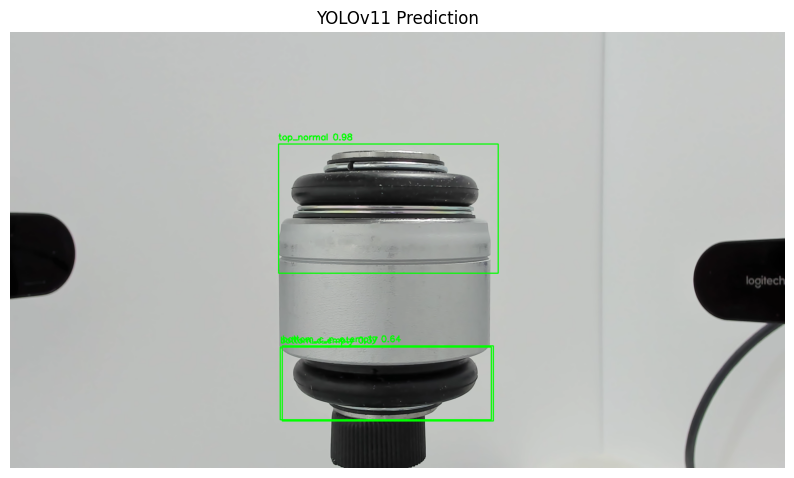

In [14]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
img_path = "/content/val/images/26_16-38-13_1.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 결과 정보 얻기
boxes = results[0].boxes
annotated = img_rgb.copy()

# 시각화 (Matplotlib 사용)
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    label = model.names[cls_id]

    # 박스 그리기
    cv2.rectangle(annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 라벨 그리기
    text = f"{label} {conf:.2f}"
    cv2.putText(annotated, text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# 6. 출력
plt.figure(figsize=(10, 6))
plt.imshow(annotated)
plt.axis("off")
plt.title("YOLOv11 Prediction")
plt.show()

0 /content/val/images/26_15-52-32_2.png

image 1/1 /content/val/images/26_15-52-32_2.png: 384x640 1 bottom_normal, 1 bottom_o_empty, 1 top_normal, 15.8ms
Speed: 5.3ms preprocess, 15.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
1 /content/val/images/26_16-39-31_2.png

image 1/1 /content/val/images/26_16-39-31_2.png: 384x640 1 bottom_normal, 1 bottom_c_empty, 1 top_normal, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
2 /content/val/images/26_15-51-01_1.png

image 1/1 /content/val/images/26_15-51-01_1.png: 384x640 1 bottom_normal, 1 bottom_o_empty, 1 top_normal, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
3 /content/val/images/26_16-39-15_1.png

image 1/1 /content/val/images/26_16-39-15_1.png: 384x640 1 bottom_c_n_o_empty, 1 bottom_c_empty, 1 top_normal, 11.3ms
Speed: 2.5ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 3

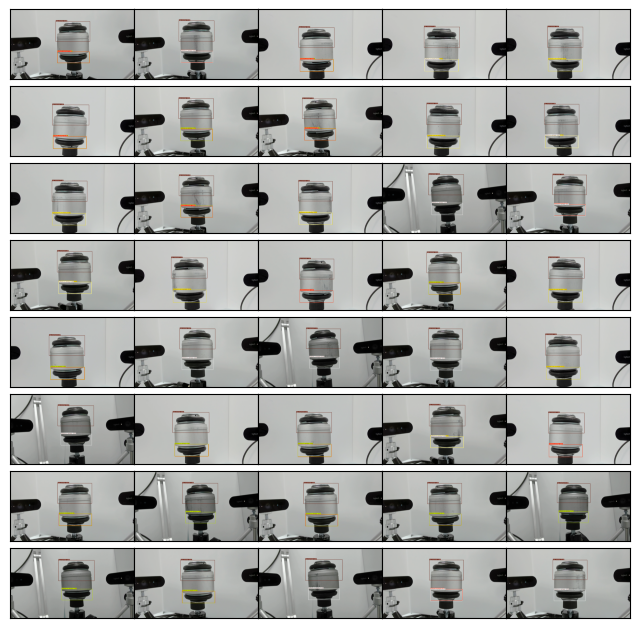

In [25]:
import glob
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

plt.figure(figsize=(8,8))
index=0
target = "/content/val/images/*.png"
for i, image_name in enumerate(glob.glob(target)[index:index+40]):
    print(i, image_name)
    results = model(image_name)
    plots = results[0].plot(conf=True, line_width=2)
    plt.subplot(8,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplots_adjust( wspace=0, hspace=0)
    plt.imshow(plots)
plt.show()

In [17]:
!pwd

/content
